# Preparing data for Modelling

In [1]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
plt.style.use('ggplot')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.base import clone

import seaborn as sns

import quantstats as qs
import os 
# pd.set_option('display.max_rows', None)
import os 

# To automatically load changes in different files 
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
# Applying Settings to Viaualization Tools 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
# Set color palette to blue shades
sns.set_palette(["#003366", "#6699CC", "#99CCFF", "#99CCFF"])
sns.set_palette(["#002855", "#3E7EAA", "#82B5D8", "#B3D9F2"])
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_style("darkgrid")
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, mean_absolute_percentage_error
import statsmodels.api as sm

import xgboost
from xgboost import XGBRegressor
# create an xgboost regression model

import tqdm 
from tqdm import tqdm 

# Visualization Tools
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
from utils import search_folder
current_dir = os.getcwd()
thesis_folder_path = current_dir.replace("/laptop code/thesis_code", "")
twitter_data_path = search_folder(thesis_folder_path,"twitter_data")
eikon_data_path = search_folder(thesis_folder_path,"eikon_news")
stock_data_path = search_folder(thesis_folder_path,"stock_prices")
modelling_data_path = search_folder(thesis_folder_path,"modelling_data")
google_trending_path = search_folder(thesis_folder_path,"google_search")
results_folder = search_folder(thesis_folder_path,"results_output")
topic_modelling = search_folder(thesis_folder_path, "topic_modelling")

In [8]:
def read_modelling(path, name):
    df = pd.read_csv(path+name)
    df["datetime"] = pd.to_datetime(df["datetime"])
    df = df.sort_values(by = "datetime", ascending = True)
    df = df.reset_index(drop = True)
    return df

---
## Stock Data 

In [9]:
stock_data_df = read_modelling(modelling_data_path, "/all_stocks_returns_df.csv")
stock_data_df.head(3)

datetime      close     net       ret       open        low       high  \
0 2017-01-03  14.465986     NaN       NaN  14.323986  14.063986  14.688652   
1 2017-01-03  29.037500     NaN       NaN  28.950000  28.690000  29.082500   
2 2017-01-04  29.005000 -0.0325 -0.001119  28.962500  28.937500  29.127500   

         volume  turnover_usd          flow company  
0  8.884890e+07  1.283684e+09  0.000000e+00   tesla  
1  1.151275e+08  3.327549e+09  0.000000e+00   apple  
2  8.447246e+07  2.452484e+09 -2.452484e+09   apple

---
## Fama French Model Features 

In [10]:
fama_french_feat_df = read_modelling(modelling_data_path, "/fama_variables_companies.csv")
fama_french_feat_df.head(3)

datetime  beta_mktrf  beta_smb  beta_hml  beta_rmw  beta_cma  idvar_ff5  \
0 2017-01-03         NaN       NaN       NaN       NaN       NaN        NaN   
1 2017-01-03         NaN       NaN       NaN       NaN       NaN        NaN   
2 2017-01-03         NaN       NaN       NaN       NaN       NaN        NaN   

   company  
0  moderna  
1    tesla  
2    apple

---
## Sentiment Model Features 

In [11]:
sentiment_df = pd.read_csv(modelling_data_path + "/master_table_news_sentiment.csv")
sentiment_df["datetime"] = pd.to_datetime(sentiment_df["date"], utc = True)
sentiment_df = sentiment_df.sort_values(by = "datetime")
sentiment_df

date  company  daytweets  textblob_tw_sw  vader_tw_sw  \
0     2017-01-02    apple     195364      108.654740     145.5335   
1     2017-01-02   google      32400       27.841547       4.7608   
2     2017-01-02    tesla      27556       69.120491      56.5365   
3     2017-01-03    apple     187489      100.070978      73.2125   
4     2017-01-03   google      15876       19.047536      36.4611   
...          ...      ...        ...             ...          ...   
6210  2023-04-13  moderna         25        4.696667       2.5965   
6213  2023-04-14   google        961        6.778229       8.8280   
6214  2023-04-14  moderna        289        3.375763       4.5592   
6212  2023-04-14    apple      13924       42.478908      52.1386   
6215  2023-04-14    tesla     164836       95.025373      91.1145   

      finbert_tw_sw  textblob_senti_sw  vader_sw  finbert_senti_sw  \
0             -35.0          50.796503       476             -22.0   
1             -50.0          11.939170       203             -23.0   
2              15.0          25.982624       181               0.0   
3             -24.0          49.393965       462             -12.0   
4             -18.0           9.819791       135              -9.0   
...             ...                ...       ...               ...   
6210            5.0           2.348333         5               3.0   
6213          -10.0           2.089114        34              -4.0   
6214           16.0           1.622256        18               8.0   
6212            8.0          23.767439       126               1.0   
6215         -111.0          48.136581       444             -67.0   

      textblob_senti_tw  vader_senti_tw  finbert_senti_tw  news_count  \
0             57.858238         83.1307             -13.0        16.0   
1             15.902377          7.2756             -27.0         0.0   
2             43.137866         33.4803              15.0         1.0   
3             50.677013         32.8160             -12.0         4.0   
4              9.227745         16.5585              -9.0         0.0   
...                 ...             ...               ...         ...   
6210           2.348333          1.5842               2.0         0.0   
6213           4.689114          5.1707              -6.0         0.0   
6214           1.753506          2.6954               8.0         0.0   
6212          18.711469         24.3339               7.0         0.0   
6215          46.888793         41.9997             -44.0         0.0   

      eik_textblob_senti_sw  eik_finbert_senti_sw  eik_vader_senti_sw  \
0                  0.107143                  -6.0             -0.2248   
1                  0.000000                   0.0              0.0000   
2                  0.000000                  -1.0              0.0000   
3                  0.000000                   0.0              0.0000   
4                  0.000000                   0.0              0.0000   
...                     ...                   ...                 ...   
6210               0.000000                   0.0              0.0000   
6213               0.000000                   0.0              0.0000   
6214               0.000000                   0.0              0.0000   
6212               0.000000                   0.0              0.0000   
6215               0.000000                   0.0              0.0000   

      textblob_eik_twi_senti  finbert_eik_twi_senti  vader_eik_twi_senti  \
0                   0.139497               0.330854             0.247211   
1                   0.117251               0.340631             0.228702   
2                   0.127801               0.342587             0.236034   
3                   0.135711               0.342123             0.238395   
4                   0.115003               0.342467             0.233191   
...                      ...                    ...                  ...   
6210                0.111336               0.343787     

---
## Topic Modelling Features

In [12]:
def parse_date(date_string):
    try:
        # Attempt to parse dates in the format "YYYY-MM-DD"
        return pd.to_datetime(date_string, format="%Y-%m-%d")
    except ValueError:
        # If parsing fails, assume the date is already in the format "YYYY-MM-DD HH:MM:SS"
        return pd.to_datetime(date_string, errors='raise')

twitter_subset_final = pd.read_csv(topic_modelling + "/topic_over_time_companies.csv")
twitter_subset_final["datetime"] = twitter_subset_final["date"].apply(parse_date)
twitter_subset_final = twitter_subset_final.drop(columns= ["date", "tweet_count"])
twitter_subset_final = twitter_subset_final.sort_values(by="datetime")


In [13]:
twitter_subset_final

Analyst Update  Company & Product News  Earnings  Energy & Oil  \
1296               0                     199         0             1   
2936              13                      55         0             0   
4576               2                      70         0             0   
2937               1                      74         0             0   
1297              13                     137         4             0   
...              ...                     ...       ...           ...   
1294               0                       0         0             0   
2935               0                      29         0             0   
4575               0                     131        10             1   
1295               0                       2         1             0   
6215               0                       9         0             0   

      Fed & Central Banks  General News & Opinion  Legal & Regulation  \
1296                    1                       9                   7   
2936                    0                       7                   4   
4576                    0                      55                   0   
2937                    0                       3                   2   
1297                    0                       6                  19   
...                   ...                     ...                 ...   
1294                    0                       1                   0   
2935                    0                       3                   0   
4575                    0                      18                  11   
1295                    0                       0                   0   
6215                    0                       1                   3   

      M&A & Investments  Macro  Markets  ...  Stock Movement  Financials  \
1296                  8      0        2  ...               8           0   
2936                  0      0        1  ...               0           0   
4576                  5      0        0  ...               1           0   
2937                  3      1        0  ...              24          14   
1297                  3      5        3  ...              10           0   
...                 ...    ...      ...  ...             ...         ...   
1294                  0      0        0  ...               1           0   
2935                  1      0        1  ...               4           0   
4575                  3      3        4  ...              11           1   
1295                  0      0        0  ...               2           0   
6215                  0      0        0  ...               2           0   

      Treasuries & Corporate Debt  Dividend  Personnel Change  IPO  company  \
1296                            0         0                 0    0    apple   
2936                            1         0                 0    0    tesla   
4576                            0         0                 2    0   google   
2937                            1         0                 0    0    tesla   
1297                            0         0                 0    0    apple   
...                           ...       ...               ...  ...      ...   
1294                            0         0                 0    0  moderna   
2935                            0         0                 1    0    apple   
4575                            3         0                 0    0    tesla   
1295                            0         0                 0    0  moderna   
6215                            0         0                 0    0   google   

      Currencies Gold, Metals & Materials   datetime  
1296           0                        0 2017-01-02  
2936           0                        0 2017-01-02  
4576           0                        0 2017-01-02  
2937           0                        0 2017-01-03  
1297           0                        0 2017-01-03  
...          ...                      ...        ...  
1294           0 

---
## Google Trending News for Companies

In [14]:
comp_google_search_df = read_modelling(modelling_data_path, "/google_searches_companies.csv")
comp_google_search_df.head()

datetime  interest  company
0 2018-04-08        31    apple
1 2018-04-15         1  moderna
2 2018-04-15        33    apple
3 2018-04-15        18    tesla
4 2018-04-22        31    apple

In [15]:
from utils import fix_dates
comp_google_search_df["datetime"] = comp_google_search_df["datetime"].apply(lambda x: fix_dates(x))
comp_google_search_df.head()

datetime  interest  company
0 2018-04-09        31    apple
1 2018-04-16         1  moderna
2 2018-04-16        33    apple
3 2018-04-16        18    tesla
4 2018-04-23        31    apple

---
## Google Trending News for Macro-News

In [16]:
makro_google_search_df = read_modelling(modelling_data_path, "/google_macro_searches.csv")
makro_google_search_df.head(3)

datetime  pandemic_mentions  inflation_mentions
0 2018-04-08                  1                  17
1 2018-04-15                  1                  16
2 2018-04-22                  1                  17

In [17]:
makro_google_search_df["datetime"] = makro_google_search_df["datetime"].apply(lambda x: fix_dates(x))
makro_google_search_df.head(3)

datetime  pandemic_mentions  inflation_mentions
0 2018-04-09                  1                  17
1 2018-04-16                  1                  16
2 2018-04-23                  1                  17

---
## Macro-Economic Data

In [18]:
macro_data_df = read_modelling(modelling_data_path, "/macro_data.csv")
macro_data_df.head(3)

datetime  euro_doll_bid  euro_doll_ask  eur_doll_high  eur_doll_low  \
0 2017-01-03         1.0404         1.0408         1.0490        1.0339   
1 2017-01-04         1.0486         1.0490         1.0499        1.0387   
2 2017-01-05         1.0603         1.0611         1.0615        1.0478   

   eur_doll_open  refresh_rate  euro_doll_bidnet  nasdaq_close  nasdaqd_net  \
0         1.0453       74707.0           -0.0053      4911.334          NaN   
1         1.0403       91660.0            0.0082      4937.205       25.871   
2         1.0489      103626.0            0.0117      4964.953       27.748   

   nasdaqd_ret  nasdaq_open  nasdaq_low  nasdaq_high  nasdaq_volume  
0          NaN     4900.854    4884.522     4928.490      152438794  
1     0.005268     4920.792    4919.803     4944.745      141126335  
2     0.005620     4936.355    4935.343     4967.901      140485654

---
## Features Table

In [19]:
# joining stock data with fama french factors
master_table = pd.merge(stock_data_df, fama_french_feat_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_table = master_table.drop_duplicates()

#  joining master table with macro data from Eikon 
master_table = pd.merge(master_table, macro_data_df, how = "left", left_on=["datetime"], right_on = ["datetime"])
master_table = master_table.drop_duplicates()

# Joining master table with makro data from google search 
master_table = pd.merge(master_table, makro_google_search_df, how = "left", left_on=["datetime"], right_on = ["datetime"])
master_table = master_table.drop_duplicates()

# Joining master table with makro data from google search 
master_table = pd.merge(master_table, comp_google_search_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_table = master_table.drop_duplicates()

--- 
### 7 - Additional Features: (Technical Analysis, Sentiment, Price patterns, etc.)

In [20]:
def prepare_df(df, col_to_pred : str, Ssenti_vars: list, lag):
    
    window = 10
    df["sma"] = df["close"].rolling(window=window, min_periods=1).mean()
    sma = df["close"].rolling(window=window, min_periods=1).mean()
    
    # Calculate RSI (Relative Strength Index)
    diff = df["close"].diff()
    up, down = diff.copy(), diff.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    avg_gain = up.rolling(window=window, min_periods=1).mean()
    avg_loss = abs(down.rolling(window=window, min_periods=1).mean())
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df["rsi"] = rsi

    # Calculate MACD (Moving Average Convergence Divergence)
    ema_12 = df["close"].ewm(span=12, adjust=False).mean()
    ema_26 = df["close"].ewm(span=26, adjust=False).mean()
    macd = ema_12 - ema_26
    df["macd"] = macd
    signal = macd.ewm(span=9, adjust=False).mean()
    df["signal"] = signal

    # Calculate Bollinger Bands
    rolling_std = df["close"].rolling(window=window, min_periods=1).std()
    upper_band = sma + 2 * rolling_std
    lower_band = sma - 2 * rolling_std
    
    df["rolling_std"] = rolling_std
    
    df["upper_bollinger"] = df["close"] > upper_band
    df["lower_bollinger"] = df["close"] < lower_band
    
    
    df["upper_bollinger"] = df["upper_bollinger"].apply(lambda x : 1 if x == True else 0)
    df["lower_bollinger"] = df["lower_bollinger"].apply(lambda x : 1 if x == True else 0)

    # Computing 1 day forward target prediction  
    target_var = "ft_target"
    df["ft_target"] = df[col_to_pred].shift(-lag)
    
    for lag in range(0,16): 
        df["lag_"+ str(lag)] = df[col_to_pred].shift(lag)
         
    df['mean2w'] = df["lag_0"].rolling(window=10).mean()
    df['std2w'] = df["lag_0"].rolling(window=10).std()
    df['std1w'] = df["lag_0"].rolling(window=5).std()
    
    for senti_var in Ssenti_vars: 
        for lag in range(1, 380, 10): 
            df["rolled_"+ senti_var + "_" +str(lag)] = df[senti_var].rolling(window = lag, min_periods=0).sum()
            
    for senti_var in Ssenti_vars: 
        for lag in range(2, 20, 1): 
            df["rolled_"+ senti_var + "_" +str(lag)] = df[senti_var].rolling(window = lag, min_periods=0).sum()
     
    df = df.drop(columns = [col_to_pred])
    
    df = df.drop_duplicates()
    
    df.fillna(0.0)
    
    return df

---
### Selecting Company and Adding Sentiment Variables

In [21]:
company = "apple"
comp_pred_df = master_table[master_table["company"] == company]
comp_pred_df.loc[:, "interest"] = comp_pred_df["interest"].ffill().fillna(0.0) # modify the original DataFrame using .loc
comp_pred_df.loc[:, "rolling_interest"] = comp_pred_df["interest"].rolling(3).mean().ffill().fillna(0.0)
comp_pred_df.loc[:, "pandemic_mentions"] = comp_pred_df["pandemic_mentions"].ffill().fillna(0.0)
comp_pred_df.loc[:, "inflation_mentions"] = comp_pred_df["inflation_mentions"].ffill().fillna(0.0)

# Selecting company
single_sentiment_df = sentiment_df[sentiment_df["company"] == company]
single_sentiment_df = single_sentiment_df.sort_values(by = "datetime")

comp_pred_df["datetime"] = pd.to_datetime(comp_pred_df["datetime"], utc = True)

# Merging Sentimnent with company data 
comp_pred_df_senti = pd.merge(comp_pred_df, single_sentiment_df, how = "left", on = ["datetime"])

senti_vars = list(sentiment_df.columns[3:-1])
senti_vars.remove("news_count")

# Compute technical labels and fill NaN values with 0.0
comp_pred_df_senti['vol'] = comp_pred_df_senti["ret"].rolling(window=252).std() * np.sqrt(252)
comp_pred_final_df = prepare_df(comp_pred_df_senti, "close", senti_vars, 1)
comp_pred_final_df = comp_pred_final_df.fillna(0.0)

# Define lists of column names
macro_vars = [ 'open', 'low', 'high', 'volume', 
              'euro_doll_bidnet', 'nasdaq_close', 'nasdaqd_net', 'nasdaqd_ret', 'nasdaq_open', 'nasdaq_low', 'nasdaq_high', 'nasdaq_volume'
              ]


macro_vars = [ 'open', 'low', 'high', 'volume', 'euro_doll_bid', 'euro_doll_ask', 'eur_doll_high', 'eur_doll_low', 'eur_doll_open', 'refresh_rate', 
              'euro_doll_bidnet', 'nasdaq_close', 'nasdaqd_net', 'nasdaqd_ret', 'nasdaq_open', 'nasdaq_low', 'nasdaq_high', 'nasdaq_volume'
              ]


google_vars = ["pandemic_mentions", "inflation_mentions", 'interest', 'rolling_interest']

lagged_vars = ['lag_0', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', "lag_10"]

techni_vars = ['mean2w', 'std2w', 'std1w']

fama_vars = ['beta_mktrf', 'beta_smb', 'beta_hml', 'beta_rmw', 'beta_cma']

technical_vars = ["sma", "rsi", "macd", "signal", "upper_bollinger", "lower_bollinger"]
technical_vars = ["sma", "rsi","rolling_std", "macd", "signal", "upper_bollinger", "lower_bollinger"]

Csenti_vars = list(comp_pred_final_df.columns[75:])
Csenti_vars += ["daytweets", "news_count"]
date = ["datetime"]
ft_target = ["ft_target"] # 

#Csenti_vars.sort(reverse=True)
comp_pred_final_df["datetime"] = comp_pred_final_df["date"].apply(parse_date)
twitter_subset_topics = twitter_subset_final[twitter_subset_final["company"] == company]
comp_pred_final = pd.merge(comp_pred_final_df,twitter_subset_topics, how = "left", on = ["datetime"])

In [23]:
#topic_ml_fts_lagged

In [27]:
comp_pred_final_test = comp_pred_final.copy()
comp_pred_final_test = comp_pred_final_test.set_index("datetime")

In [29]:

# Create the figure
fig = go.Figure()

# Iterate over the columns and add traces to the figure
for column in topic_ml_fts_lagged:
    fig.add_trace(go.Scatter(x=comp_pred_final_test.index, y=comp_pred_final_test[column], name=column))

# Update the layout
fig.update_layout(title='Apple Topics Over Time', xaxis_title='Datetime', yaxis_title='Value')

# Display the plot
fig.show()

In [30]:
from class_backtester import Backtester as bk 
model_config = {'model': {'alpha_estimation_method':'Lasso', "alpha": 0.1}}
model_config = {'model': {'alpha_estimation_method':'xgboost'}} #-----> nbest for moderna  ["rolled_finbert_senti_tw_19", "Politics"]

In [84]:
modelling_ft = None
modelling_ft = macro_vars + google_vars + lagged_vars + techni_vars + fama_vars + technical_vars #+ [ "rolled_finbert_tw_sw_351", "rolled_eik_finbert_senti_sw_131"]
comp_pred_final = comp_pred_final[comp_pred_final["datetime"] <= "2023-02-15"]
comp_pred_final.dropna(subset=["ft_target"], inplace=True)
comp_pred_final = comp_pred_final.fillna(0.0)

In [85]:
def retrieve_results(df, target_column, model_config, senti_var):
    
    company = "apple"
    target = target_column
    variables = "all"
    sentiment = senti_var
    model = "xgboost"
    comments = "permutations"

    counter = 0
    backtester = bk(df = df,
                    modeling_features = modelling_ft,
                    rolling_frw = '1D',
                    look_back_prm = 252, 
                    configurations= model_config, 
                    col_to_pred = target_column)

    backtester.run_backtest()
    track_results = {}
    global resutls_df
    resutls_df = backtester.dict_all_predictions["model"][["datetime", "ft_target","ft_target_pred"]]
    resutls_df['y_test'] = (resutls_df['ft_target'] > resutls_df['ft_target'].shift()).astype(int)
    resutls_df['y_test'] = resutls_df['y_test'].fillna(0)
    resutls_df['y_pred'] = (resutls_df['ft_target_pred'] > resutls_df['ft_target_pred'].shift()).astype(int)
    resutls_df['y_pred'] = resutls_df['y_pred'].fillna(0)
    resutls_df = resutls_df.set_index("datetime")
    track_results["trial_"+str(counter)] = {}
    track_results["trial_"+str(counter)]["company"] = company
    track_results["trial_"+str(counter)]["target"] = target
    track_results["trial_"+str(counter)]["variables"] = variables
    track_results["trial_"+str(counter)]["sentiment"] = sentiment
    track_results["trial_"+str(counter)]["model"] = model
    track_results["trial_"+str(counter)]["comments"] = comments
    track_results["trial_"+str(counter)]["precision"] = precision_score(resutls_df["y_test"], resutls_df["y_pred"])
    track_results["trial_"+str(counter)]["recall"] = recall_score(resutls_df["y_test"], resutls_df["y_pred"])
    track_results["trial_"+str(counter)]["accuracy"] = accuracy_score(resutls_df["y_test"], resutls_df["y_pred"])
    track_results["trial_"+str(counter)]["f1_score"] = f1_score(resutls_df["y_test"], resutls_df["y_pred"])
    track_results["trial_"+str(counter)]["mae"] = round(mean_absolute_percentage_error(resutls_df.iloc[:,:2]["ft_target"], resutls_df.iloc[:,:2]["ft_target_pred"]),5)*100
    track_results["trial_"+str(counter)]["datetime"] = list(resutls_df["ft_target"].index)
    track_results["trial_"+str(counter)]["y_test"] = list(resutls_df["ft_target"].values)
    track_results["trial_"+str(counter)]["y_pred"] = list(resutls_df["ft_target_pred"].values)
    results_df = pd.DataFrame.from_dict(track_results, orient='index')
    global feat_impt
    feat_impt = backtester.dict_feature_importance["xgboost"]
    return results_df

In [86]:
test = retrieve_results(comp_pred_final, "ft_target", model_config, "all topic modelling lagged")

100%|██████████| 1981/1981 [02:05<00:00, 15.83it/s]


In [87]:
test

company     target variables                   sentiment    model  \
trial_0   apple  ft_target       all  all topic modelling lagged  xgboost   

             comments  precision    recall  accuracy  f1_score   mae  \
trial_0  permutations   0.503516  0.495845  0.474725  0.499651  1.98   

                                                  datetime  \
trial_0  [2017-09-12 00:00:00, 2017-09-13 00:00:00, 201...   

                                                    y_test  \
trial_0  [39.9125, 39.57, 39.97, 39.6675, 39.6825, 39.0...   

                                                    y_pred  
trial_0  [40.23484, 39.92794, 39.847237, 39.259945, 39....

---
### Quick Trading Stategy 

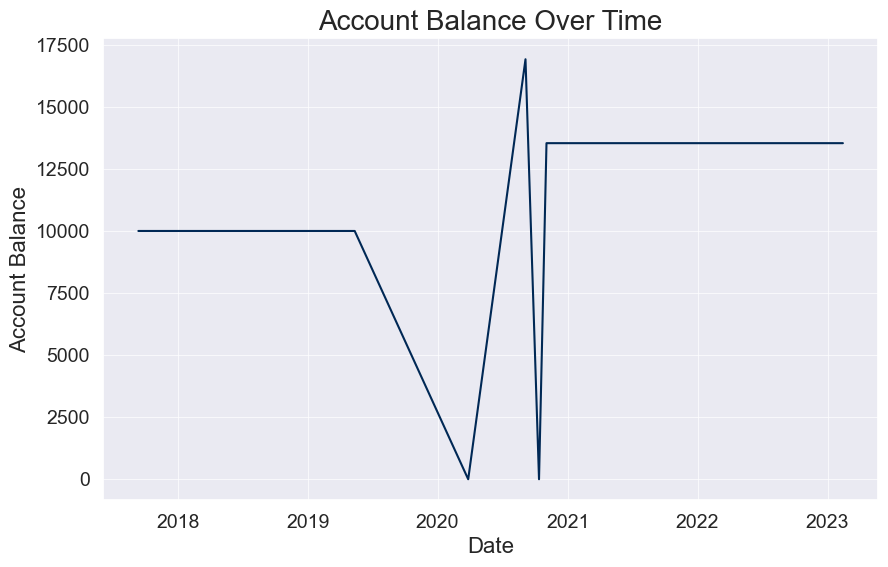

In [90]:
resutls_df["Date"] = resutls_df.index
df = resutls_df.copy()

# Calculate the percentage change in stock price
df['price_change'] = df['ft_target_pred'].pct_change()

# Define the trading thresholds
buy_threshold = 0.1  # If the predicted price change is greater than this threshold, buy
sell_threshold = - 0.1  # If the predicted price change is lower than this threshold, sell

# Initialize variables
current_position = 0  # 0 indicates no position, 1 indicates long position, -1 indicates short position
trade_history = []

# Iterate through the dataframe and execute trades
for index, row in df.iterrows():
    predicted_price_change = row['price_change']
    if predicted_price_change > buy_threshold and current_position <= 0:
        # Buy if the predicted price change is above the buy threshold and not already in a long position
        current_position = 1
        trade_history.append(('Buy', row['Date'], row['ft_target_pred']))
    elif predicted_price_change < sell_threshold and current_position >= 0:
        # Sell if the predicted price change is below the sell threshold and not already in a short position
        current_position = -1
        trade_history.append(('Sell', row['Date'], row['ft_target_pred']))

# Calculate the account balance
initial_balance = 10000  # Initial account balance in dollars
current_balance = initial_balance
current_position = 0  # 0 indicates no position, 1 indicates long position
balance_history = [(df['Date'].iloc[0], current_balance)]

# Iterate through the trade history and calculate the account balance
for trade in trade_history:
    trade_type, trade_date, trade_price = trade
    if trade_type == 'Buy':
        if current_position == 0:
            # Buy if not already in a long position
            shares_bought = current_balance / trade_price
            current_balance -= trade_price * shares_bought
            current_position = 1
    elif trade_type == 'Sell':
        if current_position == 1:
            # Sell if in a long position
            current_balance += trade_price * shares_bought
            current_position = 0
    balance_history.append((trade_date, current_balance))

# Add the remaining balance if still in a long position
if current_position == 1:
    current_balance += df['ft_target_pred'].iloc[-1] * shares_bought
balance_history.append((df['Date'].iloc[-1], current_balance))

# Convert balance history to a dataframe
balance_df = pd.DataFrame(balance_history, columns=['Date', 'Balance'])
balance_df['Date'] = pd.to_datetime(balance_df['Date'])

# Plot the balance over time
plt.plot(balance_df['Date'], balance_df['Balance'])
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.title('Account Balance Over Time')
plt.grid(True)
plt.show()


In [75]:
trade_history

[('Sell', Timestamp('2018-11-12 00:00:00'), 45.92509078979492),
 ('Buy', Timestamp('2019-01-23 00:00:00'), 42.02151107788086),
 ('Sell', Timestamp('2019-05-13 00:00:00'), 44.04048156738281),
 ('Buy', Timestamp('2019-05-14 00:00:00'), 48.79106521606445),
 ('Sell', Timestamp('2020-11-02 00:00:00'), 99.60013580322266),
 ('Buy', Timestamp('2020-11-03 00:00:00'), 111.98859405517578)]

In [82]:
balance_history[-1]

(Timestamp('2023-02-13 00:00:00'), 19492.65455934584)

In [74]:
balance_history[-1]

(Timestamp('2023-02-13 00:00:00'), 29237.796334258335)

In [68]:
balance_history[-1]

(Timestamp('2023-02-13 00:00:00'), 24249.47358564896)

In [61]:
balance_history[-1]

(Timestamp('2023-02-13 00:00:00'), 15177.097071252152)

In [91]:
# baseline score 
balance_history[-1]

(Timestamp('2023-02-13 00:00:00'), 13536.37644081116)

In [212]:
feat_impt = pd.DataFrame.from_dict(feat_impt, orient='index')
fig = px.line(feat_impt, x=feat_impt.index, y=feat_impt.columns, title="Feature Importance Over Time")
fig.update_layout(xaxis_title="Time", yaxis_title="Feature Importance")
fig.show()

---
### Moderna 


In [460]:
test ###-> moderna

company     target variables                   sentiment    model   
trial_0  moderna  ft_target       all  all topic modelling lagged  xgboost  \

             comments  precision    recall  accuracy  f1_score    mae   
trial_0  permutations   0.544843  0.549774  0.543182  0.547297  4.919  \

                                                  datetime   
trial_0  [2019-08-16 00:00:00+00:00, 2019-08-19 00:00:0...  \

                                                    y_test   
trial_0  [13.4, 14.15, 14.29, 14.16, 13.88, 14.97, 14.5...  \

                                                    y_pred  
trial_0  [13.07475, 13.350438, 13.993995, 14.370844, 14...

In [214]:
fig = px.line(feat_impt, x=feat_impt.index, y=feat_impt.columns, title="Feature Importance Over Time")
fig.update_layout(xaxis_title="Time", yaxis_title="Feature Importance")
fig.show()

In [ ]:
for senti_var in tqdm(range(len(Csenti_vars))):
        try:
                all_feat = None 
                modelling_ft = None
                all_feat = date + macro_vars + google_vars + lagged_vars + techni_vars + fama_vars + ft_target  + technical_vars + [Csenti_vars[senti_var]]
                modelling_ft =  all_feat
                modelling_ft =  modelling_ft.remove(date[0])
                modelling_ft =  modelling_ft.remove(ft_target[0])
                
                comp_pred_final = comp_pred_final_df[all_feat]
                comp_pred_final = comp_pred_final.iloc[:-1,:]
                comp_pred_final = comp_pred_final[comp_pred_final["datetime"] <= "2023-02-15 00:00:00+00:00"]
                all_results_df = pd.read_csv(results_folder + "/moderna_results_summary.csv", index_col =[0])
                all_results_df = all_results_df.drop_duplicates()

                company = "moderna"
                target = "close"
                variables = "all"
                sentiment = Csenti_vars[senti_var]
                model = "xgboost"
                comments = "permutations"

                counter = len(all_results_df)
                backtester = bk(df = comp_pred_final,
                                modeling_features = modelling_ft,
                                rolling_frw = '1D',
                                look_back_prm = 252, 
                                configurations= model_config, 
                                col_to_pred = 'ft_target')

                backtester.run_backtest()
                track_results = {}
                resutls_df = backtester.dict_all_predictions["model"][["datetime", "ft_target","ft_target_pred"]]
                resutls_df['y_test'] = (resutls_df['ft_target'] > resutls_df['ft_target'].shift()).astype(int)
                resutls_df['y_test'] = resutls_df['y_test'].fillna(0)
                resutls_df['y_pred'] = (resutls_df['ft_target_pred'] > resutls_df['ft_target_pred'].shift()).astype(int)
                resutls_df['y_pred'] = resutls_df['y_pred'].fillna(0)
                resutls_df = resutls_df.set_index("datetime")
                track_results["trial_"+str(counter)] = {}
                track_results["trial_"+str(counter)]["company"] = company
                track_results["trial_"+str(counter)]["target"] = target
                track_results["trial_"+str(counter)]["variables"] = variables
                track_results["trial_"+str(counter)]["sentiment"] = sentiment
                track_results["trial_"+str(counter)]["model"] = model
                track_results["trial_"+str(counter)]["comments"] = comments
                track_results["trial_"+str(counter)]["precision"] = precision_score(resutls_df["y_test"], resutls_df["y_pred"])
                track_results["trial_"+str(counter)]["recall"] = recall_score(resutls_df["y_test"], resutls_df["y_pred"])
                track_results["trial_"+str(counter)]["accuracy"] = accuracy_score(resutls_df["y_test"], resutls_df["y_pred"])
                track_results["trial_"+str(counter)]["f1_score"] = f1_score(resutls_df["y_test"], resutls_df["y_pred"])
                track_results["trial_"+str(counter)]["mae"] = round(mean_absolute_percentage_error(resutls_df.iloc[:,:2]["ft_target"], resutls_df.iloc[:,:2]["ft_target_pred"]),5)*100
                track_results["trial_"+str(counter)]["datetime"] = list(resutls_df["ft_target"].index)
                track_results["trial_"+str(counter)]["y_test"] = list(resutls_df["ft_target"].values)
                track_results["trial_"+str(counter)]["y_pred"] = list(resutls_df["ft_target_pred"].values)
                results_df = pd.DataFrame.from_dict(track_results, orient='index')
                all_results_df = pd.concat([all_results_df, results_df])
                all_results_df.to_csv(results_folder + "/moderna_results_summary.csv")
        except: 
                continue

---
### Feature Importance

In [423]:
from sklearn.feature_selection import RFE
import xgboost as xgb

In [447]:
X = comp_pred_final[modelling_ft+topic_ml_fts]
y = comp_pred_final["ft_target"] 
#y = (comp_pred_final['ft_target'] > comp_pred_final['ft_target'].shift()).astype(int)

In [449]:
# Define the number of desired features
num_features = 30

# Create an instance of the model you want to use for feature selection
model = xgb.XGBRegressor(random_state = 42, n_jobs = -1, verbosity = 0)

# Create the RFE object
rfe = RFE(estimator=model, n_features_to_select=num_features)

# Fit the RFE object to your data
rfe.fit(X, y)


RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric=None,
                           feature_types=None, gamma=None, gpu_id=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=None, max_leaves=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=-1, num_parallel_tree=None, predictor=None,
                           random_state=42, ...),
    n_features_to_select=30)

In [450]:
selected_features = X.columns[rfe.support_]
feature_ranking = rfe.ranking_

In [451]:
selected_feature_names = selected_features.tolist()
print("Selected Features:")
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:
open
low
high
nasdaq_close
nasdaq_volume
pandemic_mentions
inflation_mentions
lag_0
lag_2
lag_3
lag_5
lag_6
lag_7
lag_8
lag_9
lag_10
mean2w
std2w
std1w
beta_rmw
r42Company | Product News
Earnings
General News | Opinion
Macro
Politics
r42Energy | Oil
r42General News | Opinion
r42Markets
r42Stock Commentary
r42Stock Movement


In [446]:
selected_feature_names = selected_features.tolist()
print("Selected Features:")
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:
high
euro_doll_bidnet
nasdaqd_net
nasdaqd_ret
nasdaq_low
inflation_mentions
lag_0
lag_1
lag_2
lag_3
lag_4
lag_5
lag_8
lag_10
std2w
std1w
beta_mktrf
beta_smb
beta_hml
rsi
macd
signal
rolled_finbert_senti_tw_19
Analyst Update
Legal | Regulation
Politics
Stock Movement
r42Legal | Regulation
r42Markets
r42Stock Commentary


---
### Statistically Significant Variables 

In [216]:
import statsmodels.api as sm
X = comp_pred_final[modelling_ft+topic_ml_fts]
y = comp_pred_final["ft_target"]
model = sm.OLS(y, sm.add_constant(X)).fit()

In [176]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ft_target   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2789.
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        17:37:40   Log-Likelihood:                -3657.2
No. Observations:                1055   AIC:                             7440.
Df Residuals:                     992   BIC:                             7753.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
open        

In [158]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ft_target   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2554.
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        17:32:34   Log-Likelihood:                -3651.6
No. Observations:                1055   AIC:                             7441.
Df Residuals:                     986   BIC:                             7784.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
no_sentiment = resutls_df.copy()

In [ ]:
no_sentiment["noSenti_resi"] = abs(no_sentiment["ft_target"] - no_sentiment["ft_target_pred"])
no_sentiment["noSenti_resi"] = no_sentiment["noSenti_resi"].rolling(31).mean()
resutls_df["Senti_resi"] = abs(resutls_df["ft_target"] - resutls_df["ft_target_pred"])
resutls_df["Senti_resi"] = resutls_df["Senti_resi"].rolling(31).mean()

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.ft_target)
plt.plot(no_sentiment.index, no_sentiment.ft_target_pred, color = "red")
plt.plot(resutls_df.index, resutls_df.ft_target_pred)
plt.legend(["target", "no_sentiment", "sentiment"])
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.noSenti_resi)
plt.plot(resutls_df.index, resutls_df.Senti_resi, color = "green")
plt.legend(["no_sentiment", "sentiment"])
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.ft_target)
plt.plot(no_sentiment.index, no_sentiment.ft_target_pred, color = "red")
plt.plot(resutls_df.index, resutls_df.ft_target_pred)
plt.legend(["target", "no_sentiment", "sentiment"])
plt.show()

In [ ]:
no_sentiment["noSenti_resi"] = abs(no_sentiment["ft_target"] - no_sentiment["ft_target_pred"])
no_sentiment["noSenti_resi"] = no_sentiment["noSenti_resi"].rolling(365).mean()
resutls_df["Senti_resi"] = abs(resutls_df["ft_target"] - resutls_df["ft_target_pred"])
resutls_df["Senti_resi"] = resutls_df["Senti_resi"].rolling(365).mean()

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.noSenti_resi)
plt.plot(resutls_df.index, resutls_df.Senti_resi, color = "green")
plt.legend(["no_sentiment", "sentiment"])
plt.show()